<a href="https://colab.research.google.com/github/PratyushaChatterjee/DL-and-NN-Project/blob/main/Precision%20Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIGHTBGM MODEL

In [ ]:
import io
from google.colab import drive
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [ ]:
drive.mount("/content/drive")

# Load the dataset
data_path = '/content/drive/My Drive/Crop_recommendation--new.csv'
data = pd.read_csv(data_path)
data.head()


Mounted at /content/drive


,N,P,K,temperature,ph,rainfall,label
0,90,42,43,20.879744,6.502985,202.935536,rice
1,85,58,41,21.770462,7.038096,226.655537,rice
2,60,55,44,23.004459,7.840207,263.964248,rice
3,74,35,40,26.491096,6.980401,242.864034,rice
4,78,42,42,20.130175,7.628473,262.717340,rice


In [ ]:
data.shape

(6138, 7)

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
data.isnull().any()

N              False
P              False
K              False
temperature    False
ph             False
rainfall       False
label          False
dtype: bool

In [ ]:
print("Number of various crops: ", len(data['label'].unique()))
print("List of crops: ", data['label'].unique())

Number of various crops:  25
List of crops:  ['rice' 'maize' 'Soybean' 'beans' 'peas' 'groundnuts' 'cowpeas' 'banana'
 'mango' 'grapes' 'watermelon' 'apple' 'orange' 'cotton' 'coffee'
 'Sugarcane' 'Jowar' 'Wheat' 'Tur' 'Urad' 'Moong' 'Gram' 'Masoor' 'Ginger'
 'Turmeric']


In [ ]:
data['label'].value_counts()

Sugarcane     1010
Wheat          859
cotton         750
maize          469
rice           403
Jowar          394
groundnuts     250
grapes         225
Soybean        175
banana         130
Tur            126
beans          125
Ginger         125
orange         122
cowpeas        122
coffee         110
apple          100
watermelon     100
mango          100
peas           100
Urad            99
Moong           99
Gram            78
Turmeric        55
Masoor          12
Name: label, dtype: int64

In [ ]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,ph,rainfall,temperature
label,,,,,,
Ginger,70.000000,50.000000,50.000000,5.980000,948.000000,27.200000
Gram,21.153846,34.615385,39.615385,6.480769,719.230769,23.269231
Jowar,36.598985,54.631980,37.030457,6.757614,689.086294,28.312183
Masoor,22.500000,45.000000,22.500000,6.250000,650.000000,22.500000
Moong,20.909091,50.909091,26.818182,6.636364,600.000000,30.000000


In [ ]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr), orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

Soybean_npk = crop_summary[crop_summary.index=='Soybean']
values = [Soybean_npk['N'][0], Soybean_npk['P'][0], Soybean_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Soybean"),1, 3)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, soyabean",
    annotations=[dict(text='Rice', x=0.04, y=0.1, font_size=46, showarrow=False),
                 dict(text='Cotton', x=0.20, y=0.1, font_size=46, showarrow=False),
                 dict(text='Soybean', x=0.51, y=0.1, font_size=46, showarrow=False),
                 ])
fig.show()

In [ ]:
maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 1)

beans_npk = crop_summary[crop_summary.index=='beans']
values = [beans_npk['N'][0], beans_npk['P'][0], beans_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="beans"),1, 2)

peas_npk = crop_summary[crop_summary.index=='peas']
values = [peas_npk['N'][0], peas_npk['P'][0], peas_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="peas"),1, 3)

cowpeas_npk = crop_summary[crop_summary.index=='cowpeas']
values = [cowpeas_npk['N'][0], cowpeas_npk['P'][0], cowpeas_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="cowpeas"),1, 4)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for maize, beans, peas, cowpeas",
    annotations=[
                 dict(text='Maize', x=0.04, y=0.1, font_size=46, showarrow=False),
                 dict(text='Beans', x=0.24, y=0.1, font_size=46, showarrow=False),
                 dict(text='Peas', x=0.50, y=0.1, font_size=46, showarrow=False),
                 dict(text='Cowpeas', x=0.85, y=0.1, font_size=46, showarrow=False),
                 ])
fig.show()

In [ ]:
groundnuts_npk = crop_summary[crop_summary.index=='groundnuts']
values = [groundnuts_npk['N'][0], groundnuts_npk['P'][0], groundnuts_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="groundnuts"),1, 1)

Wheat_npk = crop_summary[crop_summary.index=='Wheat']
values = [Wheat_npk['N'][0], Wheat_npk['P'][0], Wheat_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Wheat"),1, 2)

Jowar_npk = crop_summary[crop_summary.index=='Jowar']
values = [Jowar_npk['N'][0], Jowar_npk['P'][0], Jowar_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Wheat"),1, 3)

coffee_npk = crop_summary[crop_summary.index=='coffee']
values = [coffee_npk['N'][0], coffee_npk['P'][0], coffee_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="coffee"),1, 4)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for groundnuts, wheat, jowar, coffee",
    annotations=[

                 dict(text='Groundnuts', x=0.0, y=0.1, font_size=40, showarrow=False),
                 dict(text='Wheat', x=0.24, y=0.1, font_size=46, showarrow=False),
                 dict(text='Jowar', x=0.50, y=0.1, font_size=46, showarrow=False),
                 dict(text='Coffee', x=0.80, y=0.1, font_size=46, showarrow=False)])
fig.show()

In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)
mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)





fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.02,y=1.15, font_size=46, showarrow=False),
                 dict(text='Banana',x=0.20,y=1.15, font_size=46, showarrow=False),
                 dict(text='Grapes',x=0.48,y=1.15, font_size=46, showarrow=False),dict(text='Orange',x=0.77,y=1.15, font_size=46, showarrow=False),
                dict(text='Mango',x=0.98,y=1.15, font_size=46, showarrow=False)])
fig.show()

In [ ]:


watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="watermelon", marker_colors=cafe_colors),1, 1)


Sugarcane_npk = crop_summary[crop_summary.index=='Sugarcane']
values = [Sugarcane_npk['N'][0], Sugarcane_npk['P'][0], Sugarcane_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Sugarcane", marker_colors=cafe_colors),1, 2)

Tur_npk = crop_summary[crop_summary.index=='Tur']
values = [Tur_npk['N'][0], Tur_npk['P'][0], Tur_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Tur", marker_colors=cafe_colors),1, 3)
Urad_npk = crop_summary[crop_summary.index=='Urad']
values = [Urad_npk['N'][0], Urad_npk['P'][0], Urad_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Urad", marker_colors=cafe_colors),1, 4)

Moong_npk = crop_summary[crop_summary.index=='Moong']
values = [Moong_npk['N'][0], Moong_npk['P'][0], Moong_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Moong", marker_colors=cafe_colors),1, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[
                dict(text='Watermelon',x=-0.07,y=1.15, font_size=40, showarrow=False),
                dict(text='Sugarcane',x=0.20,y=1.15, font_size=40, showarrow=False),
                 dict(text='Tur',x=0.50,y=1.15, font_size=40, showarrow=False),
                 dict(text='Urad',x=0.74,y=1.15, font_size=40, showarrow=False),
                dict(text='Moong',x=0.94,y=1.15, font_size=40, showarrow=False)])
fig.show()

In [ ]:

Gram_npk = crop_summary[crop_summary.index=='Gram']
values = [Gram_npk['N'][0], Gram_npk['P'][0], Gram_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Gram", marker_colors=cafe_colors),1, 1)

Masoor_npk = crop_summary[crop_summary.index=='Masoor']
values = [Masoor_npk['N'][0], Masoor_npk['P'][0], Masoor_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Masoor", marker_colors=cafe_colors),1, 2)

Ginger_npk = crop_summary[crop_summary.index=='Ginger']
values = [Ginger_npk['N'][0], Ginger_npk['P'][0], Ginger_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Ginger", marker_colors=cafe_colors),1, 3)

Turmeric_npk = crop_summary[crop_summary.index=='Turmeric']
values = [Turmeric_npk['N'][0], Turmeric_npk['P'][0], Turmeric_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Turmeric", marker_colors=cafe_colors),1, 4)
fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[
                 dict(text='Gram',x=-0.00,y=1.15, font_size=46, showarrow=False),
                dict(text='Masoor',x=0.20,y=1.15, font_size=46, showarrow=False),
                dict(text='Ginger',x=0.50,y=1.15, font_size=46, showarrow=False),
                 dict(text='Turmeric',x=0.80,y=1.15, font_size=46, showarrow=False),
                 ])
fig.show()



In [ ]:
crop_scatter = data[(data['label']=='rice') |
                     (data['label']=='maize') |
                      (data['label']=='cotton') |
                    (data['label']=='beans')|
                    (data['label']=='peas')|
                    (data['label']=='groundnuts')|
                    (data['label']=='cowpeas')|
                    (data['label']=='banana')|
                    (data['label']=='mango')|
                    (data['label']=='grapes')|
                    (data['label']=='watermelon')|
                    (data['label']=='apple')|
                    (data['label']=='orange')|
                    (data['label']=='coffee')|
                    (data['label']=='Sugarcane')|
                    (data['label']=='Jowar')|
                    (data['label']=='Wheat')|
                    (data['label']=='Tur')|
                    (data['label']=='Urad')|
                    (data['label']=='Moong')|
                    (data['label']=='Gram')|
                    (data['label']=='Masoor')|
                    (data['label']=='Ginger')|
                    (data['label']=='Turmeric')|
                    (data['label']=='Soyabean')]

fig = px.scatter(crop_scatter, x="temperature", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


In [ ]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature"])
fig.update_layout(title_text="Comparision between rainfall andtemerature ",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<ipython-input-39-0619e7b8d1c6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



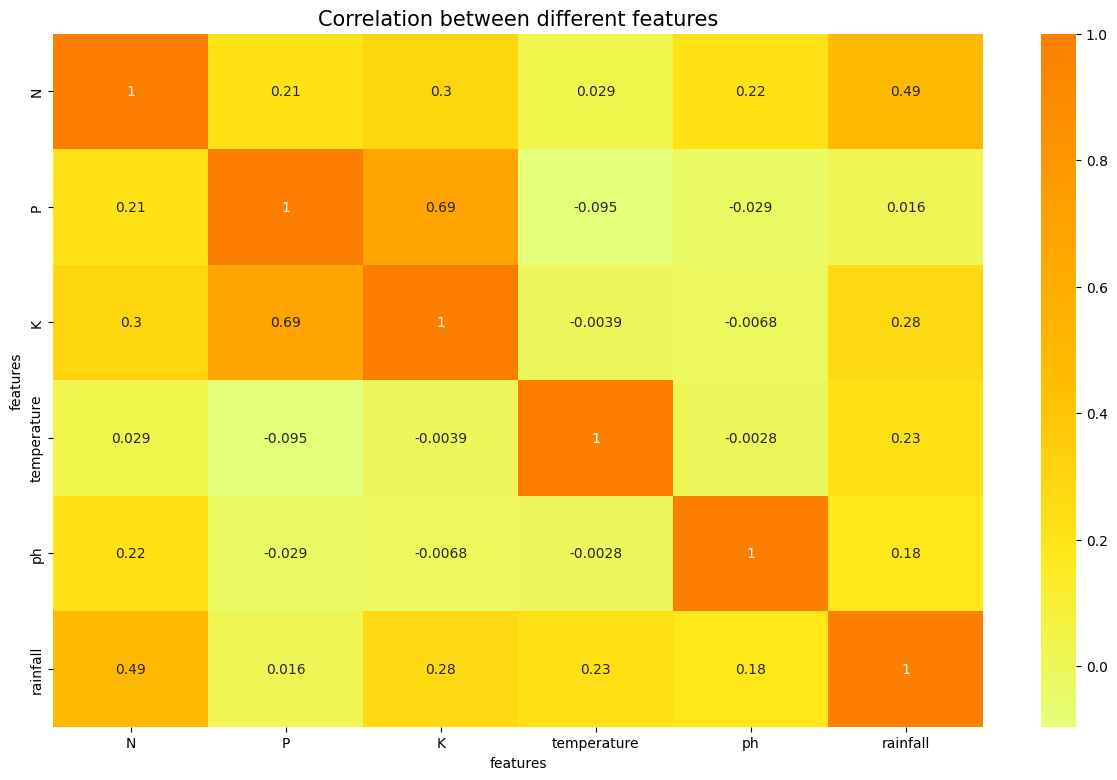

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True,cmap='Wistia' )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [ ]:
# build the lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 4296, number of used features: 6
[LightGBM] [Info] Start training from score -3.888103
[LightGBM] [Info] Start training from score -4.376456
[LightGBM] [Info] Start training from score -2.745039
[LightGBM] [Info] Start training from score -6.168215
[LightGBM] [Info] Start training from score -4.021634
[LightGBM] [Info] Start training from score -3.586316
[LightGBM] [Info] Start training from score -1.804409
[LightGBM] [Info] Start training from score -3.865630
[LightGBM] [Info] Start training from score -4.754522
[LightGBM] [Info] Start training from score -4.175785
[LightGBM] [Info] Start training from score -1.950343
[LightGBM] [Info] Start training from score -4.131333
[LightGBM] [Info] Start training from score -3.730711
[LightGBM] 

LGBMClassifier()

In [ ]:
# predict the results
y_pred=model.predict(X_test)# view accuracy
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

LightGBM Model accuracy score: 0.9843
Training-set accuracy score: 0.9995


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9995
Test set score: 0.9843


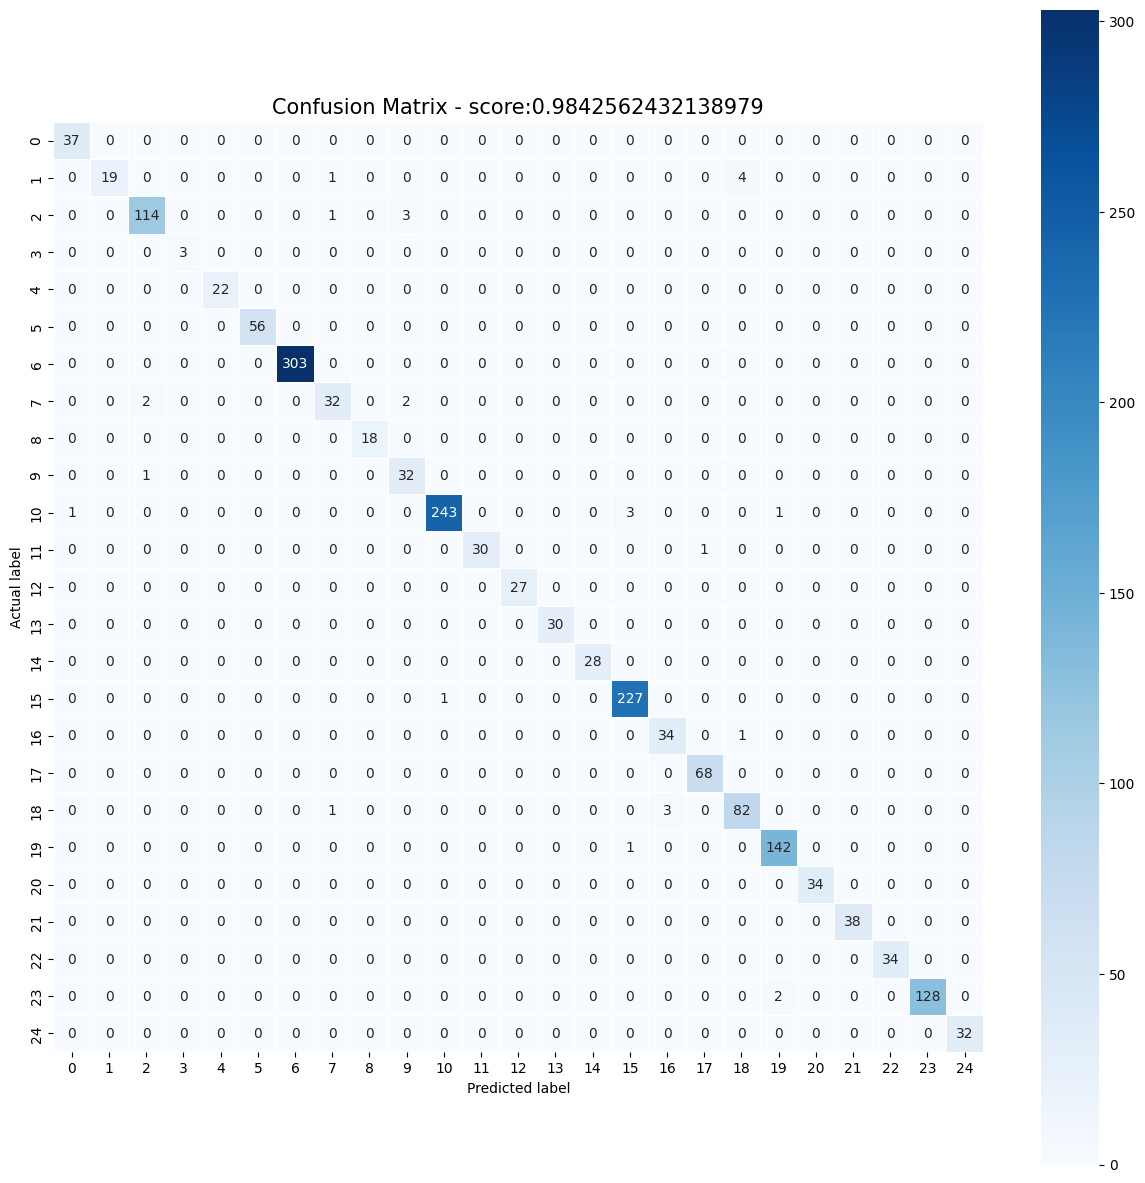

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Ginger       0.97      1.00      0.99        37
        Gram       1.00      0.79      0.88        24
       Jowar       0.97      0.97      0.97       118
      Masoor       1.00      1.00      1.00         3
       Moong       1.00      1.00      1.00        22
     Soybean       1.00      1.00      1.00        56
   Sugarcane       1.00      1.00      1.00       303
         Tur       0.91      0.89      0.90        36
    Turmeric       1.00      1.00      1.00        18
        Urad       0.86      0.97      0.91        33
       Wheat       1.00      0.98      0.99       248
       apple       1.00      0.97      0.98        31
      banana       1.00      1.00      1.00        27
       beans       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        28
      cotton       0.98      1.00      0.99       228
     cowpeas       0.92      0.97      0.94        35
      grapes       0.99    

In [ ]:
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Test set accuracy score (LightGBM): {:.4f}'.format(model.score(X_test, y_test)))


LightGBM Model accuracy score: 0.9843
Test set accuracy score (LightGBM): 0.9843


RANDOM FOREST MODEL


Random Forest Model accuracy score: 0.9767
Training-set accuracy score: 0.9995
Test set accuracy score: 0.9767


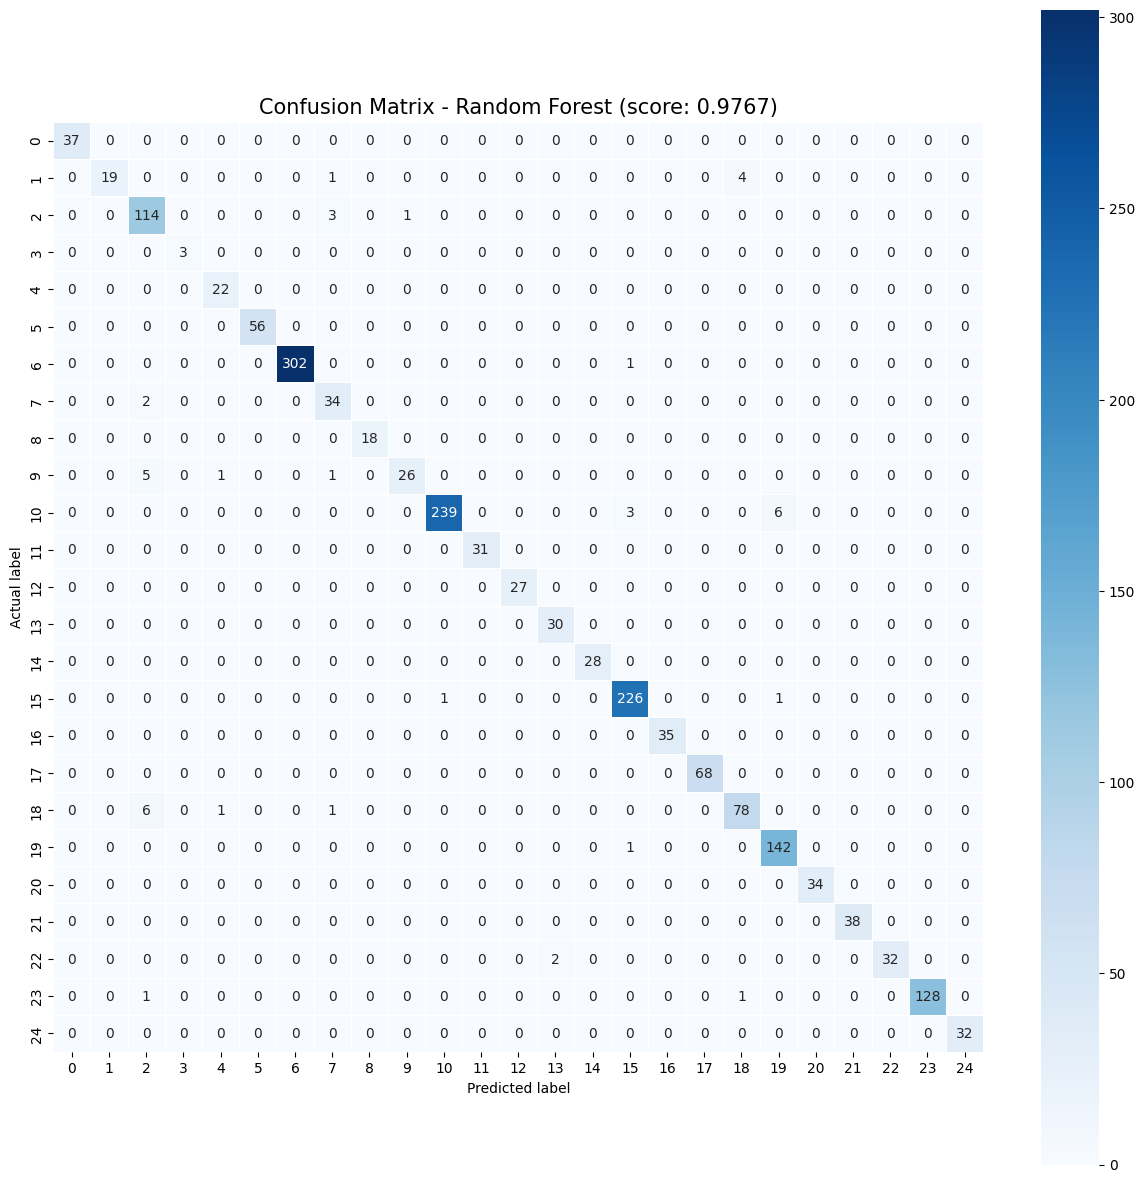

              precision    recall  f1-score   support

      Ginger       1.00      1.00      1.00        37
        Gram       1.00      0.79      0.88        24
       Jowar       0.89      0.97      0.93       118
      Masoor       1.00      1.00      1.00         3
       Moong       0.92      1.00      0.96        22
     Soybean       1.00      1.00      1.00        56
   Sugarcane       1.00      1.00      1.00       303
         Tur       0.85      0.94      0.89        36
    Turmeric       1.00      1.00      1.00        18
        Urad       0.96      0.79      0.87        33
       Wheat       1.00      0.96      0.98       248
       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        27
       beans       0.94      1.00      0.97        30
      coffee       1.00      1.00      1.00        28
      cotton       0.98      0.99      0.98       228
     cowpeas       1.00      1.00      1.00        35
      grapes       1.00    

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the dataset
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# Building the Random Forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the results
y_pred_rf = rf_model.predict(X_test)

# View accuracy
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_rf))

# View training and test set accuracy
print('Training-set accuracy score: {0:0.4f}'.format(rf_model.score(X_train, y_train)))
print('Test set accuracy score: {0:0.4f}'.format(rf_model.score(X_test, y_test)))

# View confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_rf, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Random Forest (score: {:.4f})'.format(accuracy_rf), size=15)
plt.show()

# View classification report
print(classification_report(y_test, y_pred_rf))


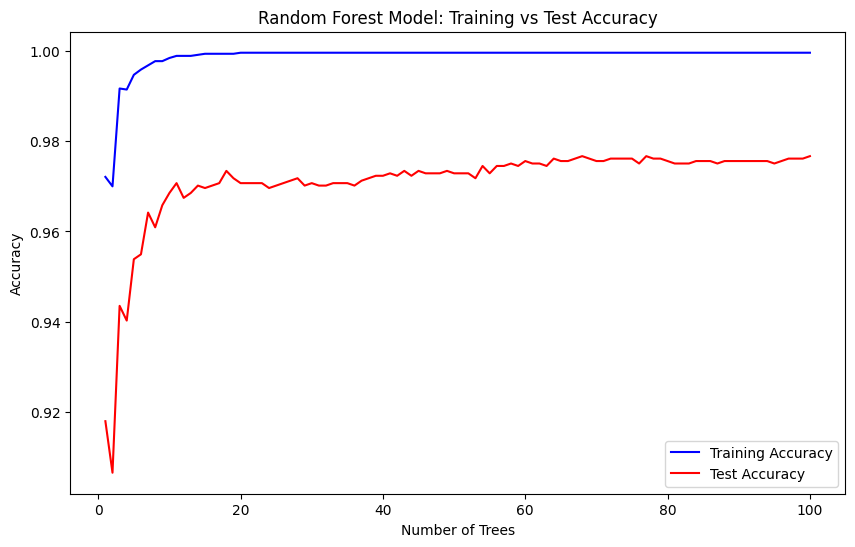

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Create lists to store training and test accuracies
train_accuracy = []
test_accuracy = []

# Define a range of number of trees to consider
num_trees_range = range(1, 101)

# Iterate over different numbers of trees
for num_trees in num_trees_range:
    # Build the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=num_trees, random_state=0)
    rf_model.fit(X_train, y_train)

    # Calculate training accuracy and append to list
    train_accuracy.append(rf_model.score(X_train, y_train))

    # Calculate test accuracy and append to list
    test_accuracy.append(rf_model.score(X_test, y_test))

# Plot the training and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, train_accuracy, label="Training Accuracy", color='blue')
plt.plot(num_trees_range, test_accuracy, label="Test Accuracy", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Model: Training vs Test Accuracy")

plt.legend()
plt.show()


In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define number of epochs
num_epochs = 50

# Define lists to store training and validation accuracies
train_accuracy = []
validation_accuracy = []

# Training loop over epochs
for epoch in range(num_epochs):
    # Train your neural network for one epoch
    # Insert code here to train your neural network for one epoch

    # Calculate training accuracy and append to list
    train_acc = # Calculate training accuracy for this epoch
    train_accuracy.append(train_acc)

    # Calculate validation accuracy and append to list
    val_acc = # Calculate validation accuracy for this epoch
    validation_accuracy.append(val_acc)

# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_epochs + 1), train_accuracy, label="Training Accuracy", color='blue')
plt.plot(np.arange(1, num_epochs + 1), validation_accuracy, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (<ipython-input-54-c470e1ed2f35>, line 18)

SVM MODEL

SVM Model accuracy score: 0.9848
Training-set accuracy score: 0.9948
Test set accuracy score: 0.9848


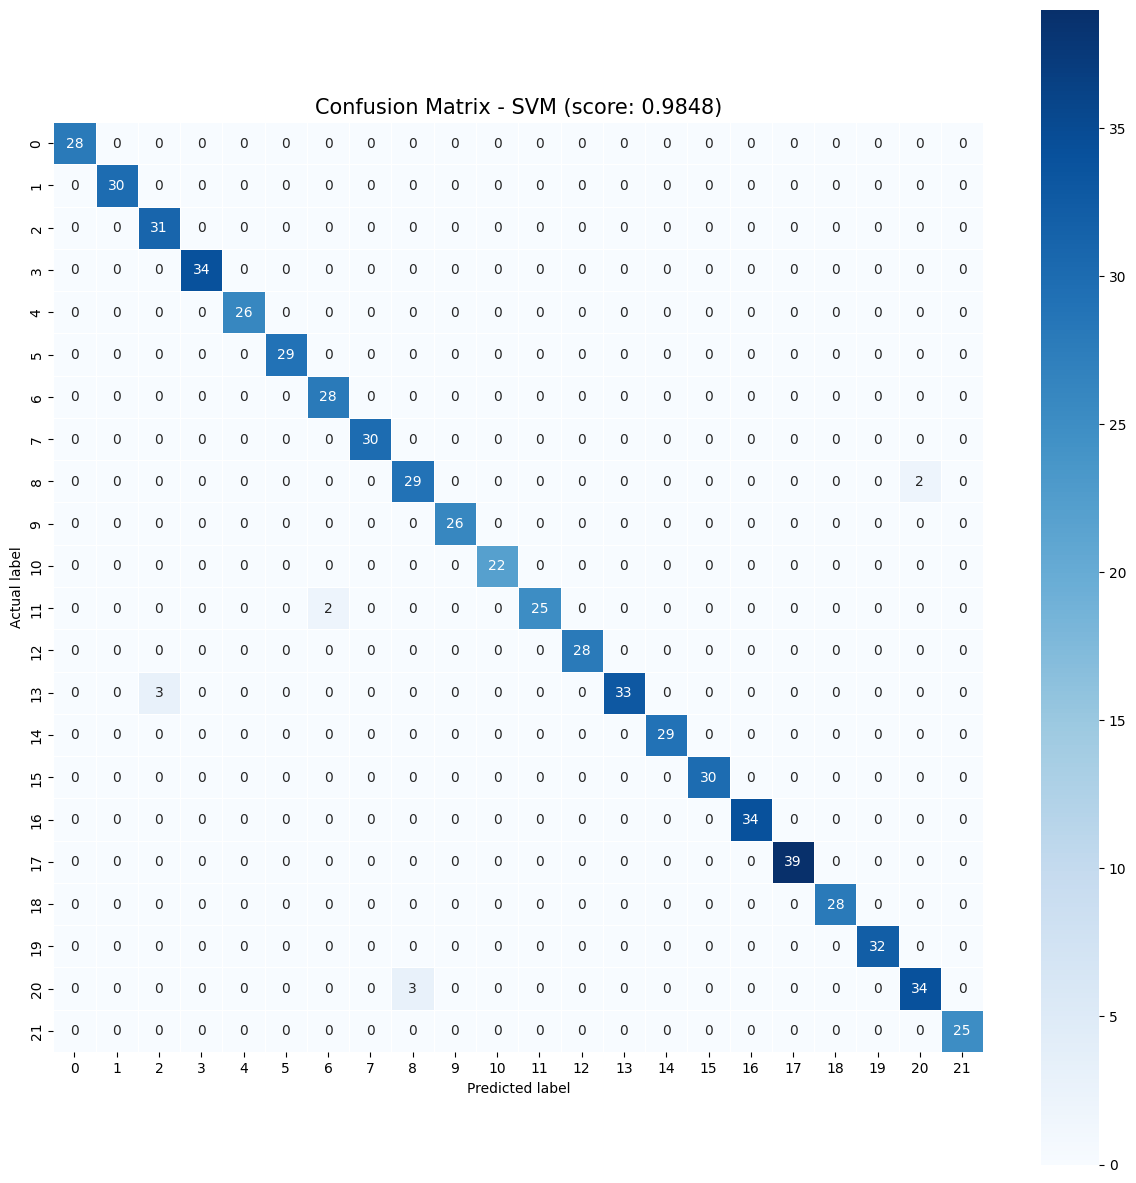

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.91      1.00      0.95        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.94      0.92        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.93      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.92      0.96        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [ ]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the dataset
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# Building the SVM model
svm_model = SVC(kernel='linear', random_state=0)
svm_model.fit(X_train, y_train)

# Predicting the results
y_pred_svm = svm_model.predict(X_test)

# View accuracy
accuracy_svm = accuracy_score(y_pred_svm, y_test)
print('SVM Model accuracy score: {0:0.4f}'.format(accuracy_svm))

# View training and test set accuracy
print('Training-set accuracy score: {0:0.4f}'.format(svm_model.score(X_train, y_train)))
print('Test set accuracy score: {0:0.4f}'.format(svm_model.score(X_test, y_test)))

# View confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_svm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - SVM (score: {:.4f})'.format(accuracy_svm), size=15)
plt.show()

# View classification report
print(classification_report(y_test, y_pred_svm))


KNN MODEL

KNN Model accuracy score: 0.9788
Training-set accuracy score: 0.9857
Test set accuracy score: 0.9788


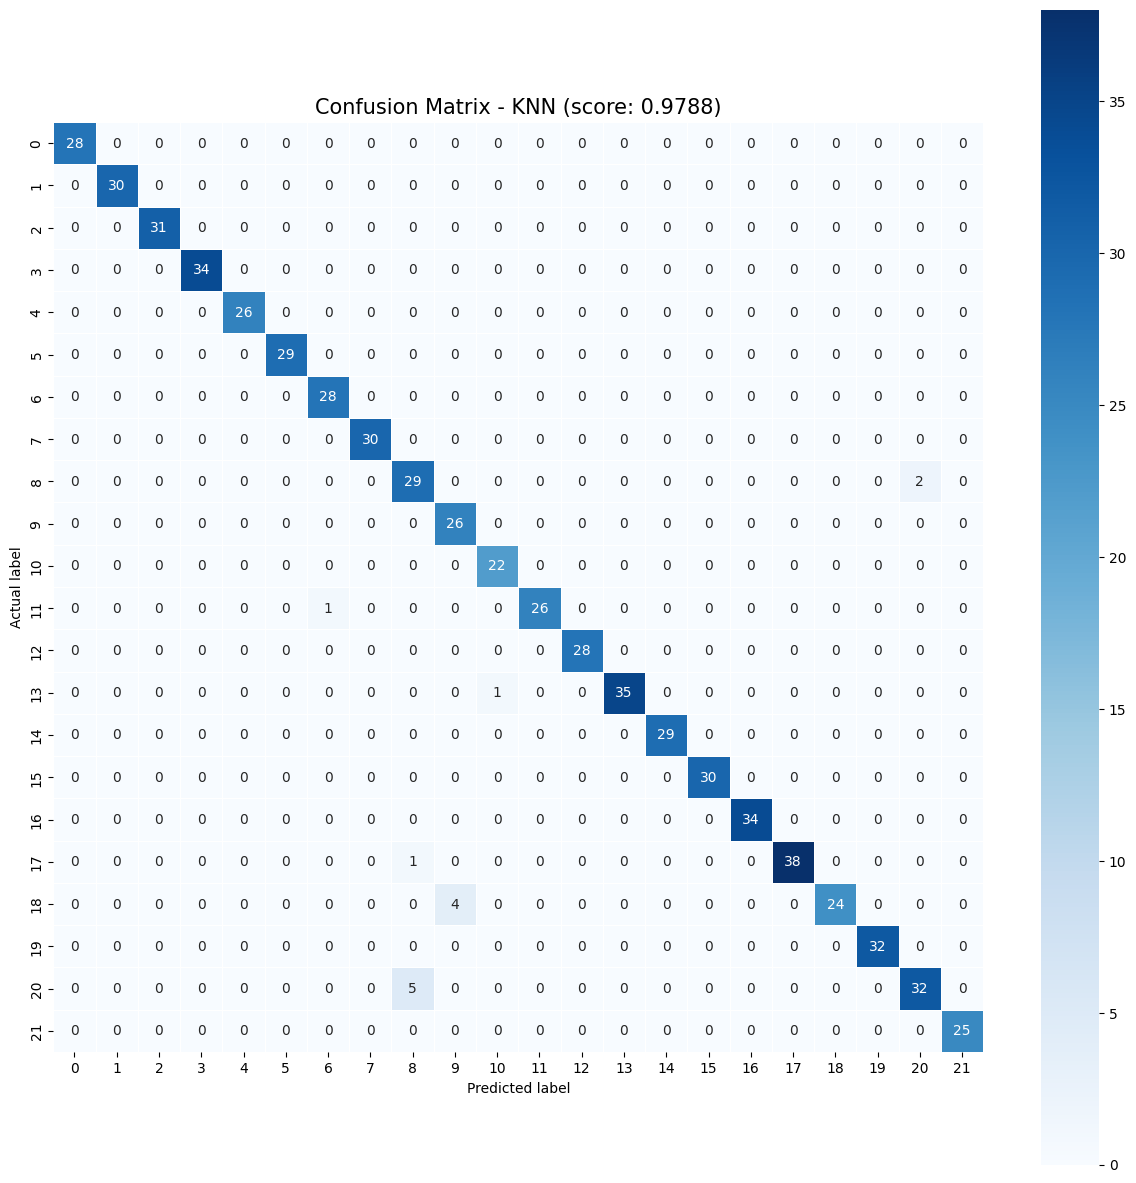

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       0.96      1.00      0.98        22
       maize       1.00      0.96      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [ ]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the dataset
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# Building the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors as per your requirement
knn_model.fit(X_train, y_train)

# Predicting the results
y_pred_knn = knn_model.predict(X_test)

# View accuracy
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print('KNN Model accuracy score: {0:0.4f}'.format(accuracy_knn))

# View training and test set accuracy
print('Training-set accuracy score: {0:0.4f}'.format(knn_model.score(X_train, y_train)))
print('Test set accuracy score: {0:0.4f}'.format(knn_model.score(X_test, y_test)))

# View confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - KNN (score: {:.4f})'.format(accuracy_knn), size=15)
plt.show()

# View classification report
print(classification_report(y_test, y_pred_knn))
